# COGS 108 - Final Project 

# Overview

The problem we are trying to solve is relevant to bike sharing services such as FordGoBike. This service in the Bay Area has multiple stations, where the users initiate their rides, and then when they’re done with their rides, they can drop off the bikes at the initial station they picked up the bike from or some other station. However, throughout the day some stations end up with a lot of bicycles leaving the stations without replacing them with other bicycles, meanwhile, other stations end up with a surplus of bicycles. Our project aims to use FordGoBike’s data to mark the stations that need to be supplied with bikes (sources) and the stations that have the surplus of bikes (sinks) to use these stations as guidelines in case there’s a need of interference in the “bike rotation process” in order to always provide users with bicycles where it’s needed. 

# Names

- Rateb Kahhaleh
- Ali Buzayan
- Yousuf Rajput
- Amer Tabban
- Osama Qarni

# Research Question

How can we determine which stations lack bikes and which stations have an excess of bikes in regards to the Ford GoBike stations in the Bay Area? 


## Background and Prior Work

By observing Spin bikes on UCSD campus, our team began to wonder about the bike usage, and which parts of campus are these bikes more existent as compared to others. We were able to see that bikes were more populated in certain areas of the campus more heavily than other areas, which made us wonder how could we gather this data in order to determine in which ways can we gather data in order to create a more balanced availability of bikes around campus so that they are not concentrated in one area at a specific time, which will affect the availability of these bikes to other areas of campuses at other times. 

We, however, decided to apply this same thought process to a much larger scale rather than focusing our research only to the UCSD campus. We decided to choose the bay area because the use of electronic bikes in that region are abundant. By observing the bike traffic there, we are able to look at the behavior of bike usage at various stations and determine which stations lack bikes and which stations are overpopulated. This allows us to understand the behavior of people in the bay area and determine which areas are in more need of transportation through bikes as compared to other areas. 



References (include links):
- 1)COGS 108 Lectures and Assignments 
- 2) The data set:  https://s3.amazonaws.com/fordgobike-data/index.html

# Hypothesis


Our research involves observing the traffic at stations in a four week interval that will work to represent the total traffic of bikes at the stations throughout the year. 

We hypothesize that some stations will end up at a given time with more bicycles than the customers need, while others will have a shortage of bikes. Also, we expect a number of stations to be self-sufficient, where no interference in the process is needed. Our project aims to mine the data and identify these stations by observing which stations receive the most usage. 


# Dataset(s)


- Dataset Name:  fordgobike-data
- Link to the dataset: https://s3.amazonaws.com/fordgobike-data/index.html
- Number of observations:  239110 observations

Explanation:
The data we used was from Ford’s GoBike, a bike share company in the Bay Area, the data contained logs of all the trips during a one month duration. Each row in the table contains a log of one trip and it contains fields such as timestamps of the start and end of the trip, start and end station ids, bike_id, user_id, and other personal user information that we cleaned and did not use as it was not needed.


# Setup

In [28]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

import seaborn as sns

In [29]:
df_april = pd.read_csv('201904-fordgobike-tripdata.csv')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No
5,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No
6,920,2019-04-30 23:57:56.3400,2019-05-01 00:13:16.4540,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976.0,Male,Yes
7,725,2019-04-30 23:56:11.2190,2019-05-01 00:08:16.9150,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973.0,Male,No
8,488,2019-04-30 23:59:00.6600,2019-05-01 00:07:08.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986.0,Male,No
9,792,2019-04-30 23:53:37.6040,2019-05-01 00:06:50.4050,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995.0,Male,No


# Data Cleaning

Our data cleaning and preprocessing involves us taking into account ethical considerations and additional information that is not relevant to our research. We start with removing personal information that does not relate to the research we are carrying out, such as birth year and gender. Additionally, we remove latitude, longitude, user type, and bike share information. 

The information that we keep are names and ID numbers of their bikes. This allows us to keep track of the names that continue to appear. We elaborate more in the “Data Analysis & Results” section on what these fields add in terms of importance to our research project. We also include the start and end stations that are visited when people decide to use a bike to travel from one location to another along with the start and end times.

For pre-processing, we also carry out additional processing that allows us to narrow down our data and information that we are observing. The data that we gathered contains approximately 240,000 rides. We go through this data frame and remove all data on rides related to weekends. We also remove any null values that appear that do not directly contribute to the research at hand. Ultimately, we are left with four smaller data frames that represent four weeks in April we have decided to analyze (the analysis and significance of our data is discussed in depth in the  “Data Analysis & Results” section. 


In [30]:
# We first drop any columns that would violate user privacy (most importantly gender and birth date) or 
# are unnecessary for our project
df_april = df_april.drop(['start_station_latitude', 
               'start_station_longitude', 
               'end_station_latitude', 
               'end_station_longitude', 
               'user_type', 
               'member_birth_year', 
               'member_gender',
               'bike_share_for_all_trip'], axis=1)

In [31]:
# We then translate the times of rides to a format that the functions we use can interpret
df_april['start_time'] = pd.to_datetime(df_april['start_time'])
df_april['end_time'] = pd.to_datetime(df_april['end_time'])

In [32]:
# Next we drop any null values
rows_to_drop = df_april[df_april.isnull().any(axis=1)]

In [33]:
# Then we create four maskes to split the month into 4 weeks (4 dataframes) & drop weekends 
mask1 = (df_april['start_time'] > '2019-04-01') & (df_april['start_time'] < '2019-04-06')
mask2 = (df_april['start_time'] > '2019-04-08') & (df_april['start_time'] < '2019-04-13')
mask3 = (df_april['start_time'] > '2019-04-15') & (df_april['start_time'] < '2019-04-20')
mask4 = (df_april['start_time'] > '2019-04-22') & (df_april['start_time'] < '2019-04-27')

# Apply the masks to the april dataframe so that we have a dataframe per week in april
# Each dataframe consists of Monday through Friday
df_w1 = df_april.loc[mask1]
df_w1 = df_w1.reset_index(drop=True, inplace=False)
#print(df_w1.shape)

df_w2 = df_april.loc[mask2]
df_w2 = df_w2.reset_index(drop=True, inplace=False)
#print(df_w2.shape)

df_w3 = df_april.loc[mask3]
df_w3 = df_w3.reset_index(drop=True, inplace=False)
#print(df_w3.shape)

df_w4 = df_april.loc[mask4]
df_w4 = df_w4.reset_index(drop=True, inplace=False)
#print(df_w4.shape)

# Combine the four cleaned up weeks into one data frame
april_weekdays = pd.concat([df_w1,df_w2, df_w3, df_w4])

# We use print statements throughout to make sure we cleaned the data properly

# print(len(df_w1['start_station_id'].unique()))
# print(len(df_w2['start_station_id'].unique()))
# print(len(df_w3['start_station_id'].unique()))
# print(len(df_w4['start_station_id'].unique()))
# print(len(df_april['start_station_id'].unique()))

# print(len(df_w1['end_station_id'].unique()))
# print(len(df_w2['end_station_id'].unique()))
# print(len(df_w3['end_station_id'].unique()))
# print(len(df_w4['end_station_id'].unique()))
# print(len(df_april['end_station_id'].unique()))

# Data Analysis & Results

We will break up our analysis based off of the different information we decided to keep in our data frames and also how we decided to break our data frames up (such as what they represent). 

We mentioned that the data we included in our data frames were ID numbers and names of the individuals using the bikes. This information is essential because it allows us to depict the behavior of individuals in terms of bike usage. By including the names of people, we will be able to use those names in order to view the frequency in which that individual leaves the start station and reaches an end station, information we also included in our data set and in our data frames. The ID numbers allow us to track which bikes were used and where they ended up. With the use of this information, we are able to observe which stations are over populated with bikes and which stations lack sufficient bikes. By tracking the start and end stations, we can view the traffic of bikes and their concentration. 

In addition to the start and end stations, we will also be looking at the start and end times. This is important because this is what will allow us to determine how to solve the issue of overly concentrated bikes in one area and the lack of in others. By including these two pieces of data of the bikes in our analysis, we will look for times which the start times of the bike is the least. In other words, we will find the time that the least amount of people are using bikes. With the least traffic of bikes, we will be able to narrow down which time/s is best in order to transfer bikes from a high concentration of bikes to an area that has less bikes but is in need of them. 

We have done this by first looking at all the times that bikes are removed from a station (bikers starting to ride) and bikes added to a station (bikers have returned a bike to a station). We then plotted a graph that depicted the bikes removed from stations minus the bikes added to stations. We were then able to see which stations needed bikes and from which stations we can take them from. For example, we can see from our data set and graph that there were many bikes left at Caltran Station 2. We are also able to see that many bikes were taken out of Stewart St. In this scenario, what we can determine is that we need to remove bikes from Caltran Station 2 and add them to Stewart St, and the best time to do this is when the overall traffic is the least. 

From our given data, we have stated that we have removed weekends. This is important because we want an accurate representation of the traffic we would like to analyze. Because most of the traffic is done during employment hours and lunch hours on weekdays, we decided to remove the bike traffic over weekends so we can get a better representation of the bike usage behavior. By focusing on the weekdays, we are able to get a more evenly distributed data set that represents the times in which people use the bikes the most. 

We also narrowed our data set to that in April. We believe this to be an important time period in which the traffic will be the best represented because it is a time in Spring where people will be using bikes the most. It is also a time before the start of summer, so the people using the bikes in the region are most probably residents in that region. During the summer time, many residents travel and there exists many tourists using the same bikes as well. We want to assure that we have a representation of the traffic that includes the residents of the bay area. 

Furthermore, we split our data into four different data frames that represent the four weeks in April. In doing so, we will be able to comprare the traffic in the bay area with all four weeks. By examining, the four weeks individually in the four different data frames, we would be able to observe the traffic accurately in a modularized fashion. This allows for high cohesion between the data amongst the four data frames and also a loosely coupled representation where the four weeks are not interdependent. This allows for a more accurate analysis that does not interfere with other data that might or might not be related to each other. We want to assure that we are analyzing the data structurally and not creating patterns that do not exist. 


In [35]:
#Get the data for the stations that receive bikes, set the as columns in the df
top_11_sinks = april_weekdays['end_station_name'].value_counts().head(11)
top_11_sinks = pd.DataFrame(top_11_sinks.to_dict().items(), columns = ['Station Names', 'Bikes Dropped Off'])
top_11_sinks.sort_values(by=['Station Names'], inplace = True, ascending = False)

#create bar graph with the sinks, or the stations with the bikes 
plt.figure(figsize = (10, 4))
plt.yticks(np.arange(11), top_11_sinks['Station Names'])
plt.barh(np.arange(11), top_11_sinks['Bikes Dropped Off'])

#label the bar graph x and y columns 
plt.xlabel('Number of Bikes Returned', fontsize = 13)
plt.ylabel('Station Name', fontsize = 13)

plt.show()

ValueError: DataFrame constructor not properly called!

Above is a graph of the top 11 stations from which bikes were taken and the number of bikes taken from those stations.

In [19]:
#Get the data for the stations that have bikes removed, set the as columns in the df
top_11_sources = april_weekdays['start_station_name'].value_counts().head(11)
top_11_sources = pd.DataFrame(top_11_sources.to_dict().items(), columns = ['Station Names', 'Bikes Taken'])
top_11_sources.sort_values(by=['Station Names'], inplace = True, ascending = False)

#create bar graph with stations that have the bikes removed, or the sources 
plt.figure(figsize = (10, 4))
plt.yticks(np.arange(11), top_11_sources['Station Names'])
plt.barh(np.arange(11), top_11_sources['Bikes Taken'], color = (1, 0.55, 0))

#set the x and y columns of the bar graph
plt.xlabel('Number of Bikes Taken', fontsize = 13)
plt.ylabel('Station Name', fontsize = 13)

plt.show()

ValueError: DataFrame constructor not properly called!

In [36]:
plt.figure(figsize = (10, 4))

#create a bar graph that depicts the sinks and sources side by side so that we 
#may use them as a comparison
plt.barh(np.arange(11), top_11_sinks['Bikes Dropped Off'], 0.4, label = 'sink')
plt.barh(np.arange(11) + 0.4, top_11_sources['Bikes Taken'], 0.4, color = (1, 0.55, 0), label = 'source')
plt.yticks(np.arange(11), top_11_sources['Station Names'])

#set the labels for the bar graph
plt.xlabel('Number of Bikes Taken/Returned', fontsize = 13)
plt.ylabel('Station Name', fontsize = 13)

#display the bar graph
plt.legend()
plt.show()

KeyError: 'Bikes Dropped Off'

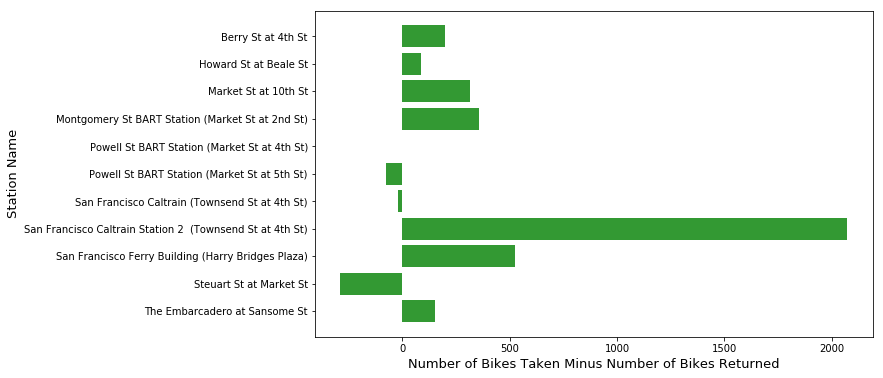

In [475]:
#top_stations = april_top11.keys()

#create a new dataframe
diff = pd.DataFrame()

#add the sinks and sources to the df 
diff['in_val'] =  top_11_sinks['Bikes Dropped Off']
diff['out_val'] =  top_11_sources['Bikes Taken']

#set the difference between the sinks and sources 
diff['in_out_diff'] = diff['in_val'] - diff['out_val']
diff['Station Names'] = top_11_sinks['Station Names']

#plot the sinks and sources 
plt.figure(figsize = (10, 6))

plt.barh(np.arange(11), diff['in_out_diff'], color = (0.2, 0.6, 0.2))
plt.yticks(np.arange(11), diff['Station Names'])

#label the x and y lables 
plt.xlabel('Number of Bikes Taken Minus Number of Bikes Returned', fontsize = 13)
plt.ylabel('Station Name', fontsize = 13)

#display the bar graph with the differences 
plt.show()

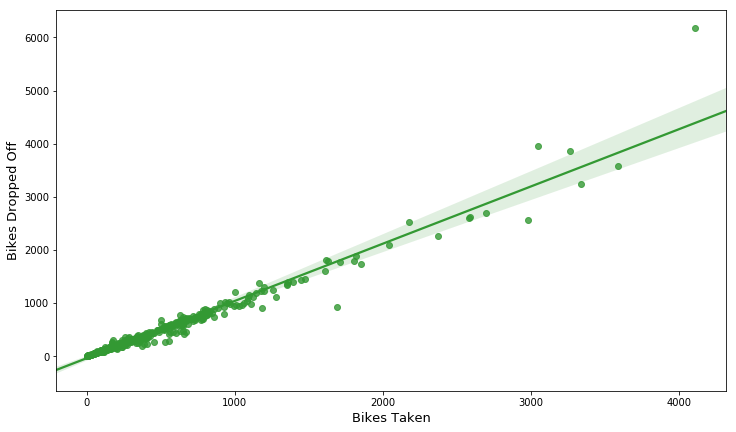

In [476]:

dic= { 'out_val':april_weekdays['start_station_id'].value_counts(), 
 'in_val':april_weekdays['end_station_id'].value_counts() }

pd.DataFrame(dic)

#want to plot the difference between the sinks and sources 
dic['in_out_diff'] = dic['out_val'] - dic['in_val']

#set the dataframe of the april traffic of bikes 
april_diff = pd.DataFrame(dic)

rplt = sns.regplot(april_diff['out_val'], april_diff['in_val'], color = (0.2, 0.6, 0.2))
rplt.figure.set_size_inches(12, 7)

#label the x and y axis 
plt.xlabel('Bikes Taken', fontsize = 13)
plt.ylabel('Bikes Dropped Off', fontsize = 13)

#display scatter graph
plt.show()

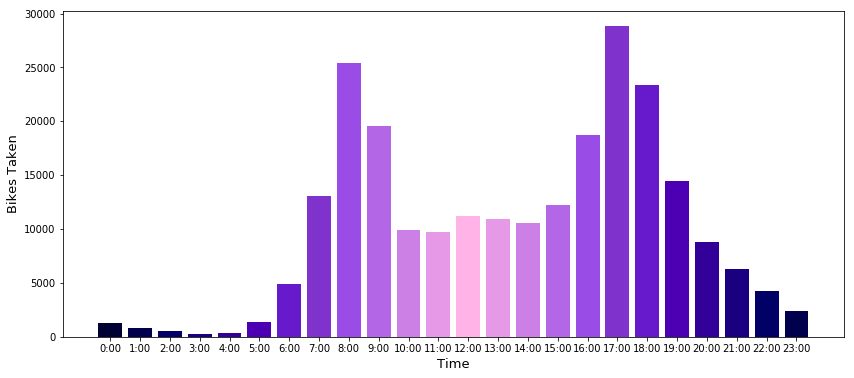

In [480]:
# Add an hours column to help find out the best hour to move bikes around during
df_april['hours'] = df_april.start_time.dt.hour

business_Hours = pd.DataFrame((df_april['hours'].value_counts().to_dict()).items(), columns = ['hours', 'frequencies'])

#business_Hours.plot(kind='bar', align = 'center')

#sort the hour values 
business_Hours.sort_values(by=['hours'], inplace = True)
business_Hours['hours'] = business_Hours['hours'].astype(str) + ':00'
#print(business_Hours)

#set the x and y labels 
x= business_Hours['hours']
y = business_Hours['frequencies']

#set the figure 
plt.figure(figsize = (14, 6))

#create a color scheme for all the hours throughout the day
plt.bar(x, y, color = [(0, 0, 0.2), (0, 0, 0.3), (0, 0, 0.4), (0.1, 0, 0.5), (0.2, 0, 0.6),
                       (0.3, 0, 0.7), (0.4, 0.1, 0.8), (0.5, 0.2, 0.8), (0.6, 0.3,0.9), 
                       (0.7, 0.4, 0.9), (0.8, 0.5, 0.9), (0.9, 0.6, 0.9), (1, 0.7, 0.9), 
                       (0.9, 0.6, 0.9), (0.8, 0.5, 0.9), (0.7, 0.4, 0.9), (0.6, 0.3, 0.9),
                       (0.5, 0.2, 0.8), (0.4, 0.1, 0.8), (0.3, 0, 0.7), (0.2, 0, 0.6),
                       (0.1, 0, 0.5), (0, 0, 0.4), (0, 0, 0.3), (0, 0, 0.2)])

#modify x and y labels and then display the bar graph of bike traffic in a day 
plt.xlabel('Time', fontsize = 13)
plt.ylabel('Bikes Taken', fontsize = 13)
plt.show()

In [479]:
## YOUR CODE HERE
#df_w1['start_station']
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

The ethics that we had to consider for our data set involved with personal information of the individuals who rode the bikes between the stations. This data and information involved the names, gender, and birth years. In our data cleaning and preprocessing, we removed gender and birth years. Because this information was not necessary to the research work at hand, it is better to not to handle the personal information of other individuals. The names, however, was a key part of the research because it is what allows us to track the bike traffic. By tracking these names, we were able to observe the areas that received the most scooters at certain stations and locations. User privacy is exceptionally important when considering the ethics of anything done with this data set. Any information that tracks people’s movement is rather sensitive and could be a large violation of privacy, especially when used in an unethical matter. For that reason, it is important to maintain user anonymity when collecting data on their trips. It is also important that the data is strictly used for the betterment of the service without intruding into users’ personal life. For example, attempting to use the data to predict users’ movement outside of the use of the bike would be extremely ethically questionable, especially if the users are not informed of this use. Overall, the largest ethical consideration by far is user privacy.



# Conclusion & Discussion

From our analysis process, we can see from the presented data that there is a need to transfer bikes between stations so that we can assure that all stations have bikes that individuals can access in order to ride from one location to another. 

When looking at the problem of what time is the best to transfer bikes, we can see from the last bar graph that the best time to do this is at 3AM. This is because this is the time of the day that receives the least bike traffic. By doing this, we can assure that we will conflict with the riders' schedules the least. 

The issue, however, is with statins like CalTran 2. This is because these stations are frequent sinks. This means that there is frequent traffic to these stations from other stations, and this causes problems because this leaves times of the day where other stations are left with a depleted number of bikes, and restoring them is difficult because of the high traffic. 

We can also see from the scatter plot of the existence of some outliers. This is not representative of the average bike usage and so using those points is not ideal for our research. It is important that we will be mainly examining the data points along the line. 

With this data and analysis, we can conclude that we need to create a system to restore bikes to other stations that need them. We have figired out a time that allows us to do this so that each day the stations can have the normal amount of bikes restored. 

By observing and analyzing these behaviors and the traffic of bike usage, we're able to come to certain conclusions that will help us better understand how to tackle an issue and come up with a solution from the data we were able to gather. 